# CSE474/574 - Programming Assignment 2

## Part 1 - Sentiment Analysis

In the code provided below, you need to add code wherever specified by `TODO:`. 

> You will be using a Python collection class - `Counter` to maintain the word counts. 

> See https://docs.python.org/2/library/collections.html for more details.

In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
# read data files 
g = open('reviews.txt','r') # What we know!
reviews_all = list(map(lambda x:x[:-1],g.readlines()))
g.close()
g = open('labels.txt','r') # What we WANT to know!
sentiments_all = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

# load vocabulary
g = open('vocab.txt','r')
vocab = [s.strip() for s in g.readlines()]

The data is a set of 25000 movie reviews, along with a `POSITIVE` or `NEGATIVE` sentiment label assigned to the review.

In [3]:
# Check out sample reviews
print('A {} review:'.format(sentiments_all[0]))
print(reviews_all[0])
print('\nA {} review:'.format(sentiments_all[1]))
print(reviews_all[1])

A POSITIVE review:
bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   

A NEGATIVE review:
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comed

In [4]:
# split into training and test data
reviews_train,reviews_test = reviews_all[0:24000],reviews_all[24000:]
sentiments_train,sentiments_test = sentiments_all[0:24000],sentiments_all[24000:]

In [6]:
# maintain Counter objects to store positive, negative and total counts for
# all the words present in the positive, negative and total reviews.
positive_word_count = Counter()
negative_word_count = Counter()
total_counts = Counter()

# TODO: Loop over all the words in the vocabulary
# and increment the counts in the appropriate counter objects
# based on the training data
for i in range(len(reviews_train)):
    wordlst = reviews_train[i].split(" ")
#     for k in range(30):
#         print(wordlst[k])
    for j in wordlst:
        if(not j == ""):
            if(sentiments_train[i] == "POSITIVE"):
                positive_word_count[j] += 1
            else:
                negative_word_count[j] += 1
            total_counts[j] += 1

In [7]:
print(positive_word_count.most_common(10))

[('the', 166905), ('.', 153420), ('and', 86383), ('a', 80407), ('of', 74000), ('to', 64131), ('is', 55174), ('in', 48414), ('br', 47307), ('it', 46040)]


In [16]:
# maintain a Counter object to store positive to negative ratios 
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        # TODO: Code for calculating the ratios (remove the next line)
        if(negative_word_count[term]==0):
            pos_neg_ratios[term] = (positive_word_count[term]+1)/(negative_word_count[term]+1)
        else:
            pos_neg_ratios[term] = positive_word_count[term]/negative_word_count[term]


In [17]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0618582280413789
Pos-to-neg ratio for 'amazing' = 4.031496062992126
Pos-to-neg ratio for 'terrible' = 0.17256637168141592


In [21]:
# take a log of the ratio
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)
    

In [22]:
for term,cnt in list(pos_neg_ratios.most_common()):
    print(term+" "+str(cnt))

astaire 2.2141741356499924
lemmon 2.1559816188021705
captures 2.1115298562313365
voight 2.1102132003465894
wonderfully 2.083006607844332
brosnan 2.0193376176101303
powell 2.017566137961748
bakshi 1.9636097261547143
ritter 1.9459101490553132
lincoln 1.9393954680341194
delightful 1.8913893101768964
bourne 1.8870696490323797
andrews 1.8718021769015913
refreshing 1.8689491079191851
flynn 1.8484548129046001
homer 1.8382794848629478
gripping 1.8325814637483102
breathtaking 1.8142323250801136
sadness 1.80280930541464
palma 1.791759469228055
elvira 1.7841548698428356
underrated 1.7760111122599158
lily 1.7707060600302227
extraordinary 1.7635885922613586
beautifully 1.7589696464050641
superb 1.7249507995559448
delight 1.7165360479904674
favorites 1.6945957207744073
timeless 1.6945957207744073
welles 1.6835458845878224
macy 1.6817585740137264
unforgettable 1.6711314814394402
hartley 1.6700625342505353
sinatra 1.6643145226599347
friendship 1.6504459361614774
jackie 1.6413555154024055
sullivan 1.64

nude -0.2972515234679316
required -0.2972515234679316
jump -0.29771224681171826
believe -0.29814572796500516
leg -0.29849298855599654
superficial -0.29849298855599654
bodies -0.2992428948528569
murdered -0.29940553614784016
ship -0.2995971070296521
stuff -0.30018223521601234
angry -0.3022808718729337
properly -0.3022808718729337
ho -0.3022808718729337
beyond -0.3037494806303454
confused -0.3039956479433047
tame -0.30421137440299145
average -0.3048351516780304
stop -0.30502516449007194
count -0.3064699863174141
myself -0.30661008233729975
doesn -0.3067099900277144
running -0.3075562586588645
ruin -0.3085472109157426
dialogs -0.3090048419206021
pat -0.3090048419206021
actually -0.3094549749388177
female -0.3101549283038396
producing -0.3101549283038396
contain -0.3112125698619751
ideas -0.3120735255759401
commercials -0.3128723212803394
want -0.31337696450335045
cops -0.3139727676834986
christmas -0.3141153295199364
exception -0.31458952537170526
fault -0.3156381497183709
kid -0.31598342

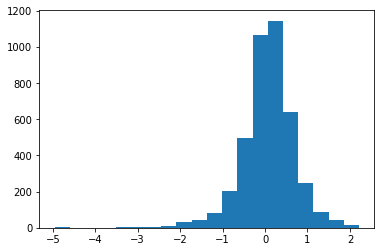

In [23]:
# visualize the distribution of the log-ratio scores
scores = np.array(list(pos_neg_ratios.values()))
vocab_selected = list(pos_neg_ratios.keys())

h = plt.hist(scores,bins=20)

The above histogram should give you an idea about the distribution of the scores.

Notice how the scores are distributed around 0. A word with score 0 can be considered as `neutral`. 

In [ ]:
# Print few words with neutral score
for ind in np.where(scores == 0)[0][0:10]:
    print(vocab_selected[ind])

**APPROACH 1** Implement a simple non-machine learning that only uses the log-ratios to determine if a review is positive or negative. This function will be applied to the test data to calculate the accuracy of the model. 

_See the assignment document for hints._

In [ ]:
def nonml_classifier(review,pos_neg_ratios):
    '''
    Function that determines the sentiment for a given review.
    
    Inputs:
      review - A text containing a movie review
      pos_neg_ratios - A Counter object containing frequent words
                       and corresponding log positive-negative ratio
    Return:
      sentiment - 'NEGATIVE' or 'POSITIVE'
    '''
    # TODO: Implement the algorithm here. Change the next line.
    return 'NEGATIVE'

In [ ]:
predictions_test = []
for r in reviews_test:
    l = nonml_classifier(r,pos_neg_ratios)
    predictions_test.append(l)

# calculate accuracy
correct = 0
for l,p in zip(sentiments_test,predictions_test):
    if l == p:
        correct = correct + 1
print('Accuracy of the model = {}'.format(correct/len(sentiments_test)))

**Approach 2** Implement a neural network for sentiment classification. 

> ### System Configuration
This part requires you to use a computer with `tensorflow` library installed. More information is available here - https://www.tensorflow.org.
`
You are allowed to implement the project on your personal computers using `Python 3.4 or above. You will need `numpy` and `scipy` libraries. If you need to use departmental resources, you can use **metallica.cse.buffalo.edu**, which has `Python 3.4.3` and the required libraries installed. 

> Students attempting to use the `tensorflow` library have two options: 
1. Install `tensorflow` on personal machines. Detailed installation information is here - https://www.tensorflow.org/. Note that, since `tensorflow` is a relatively new library, you might encounter installation issues depending on your OS and other library versions. We will not be providing any detailed support regarding `tensorflow` installation. If issues persist, we recommend using option 2. 
2. Use **metallica.cse.buffalo.edu**. If you are registered into the class, you should have an account on that server. The server already has Python 3.4.3 and TensorFlow 0.12.1 installed. Please use /util/bin/python for Python 3. 
3. To maintain a ssh connection for a long-running task on a remote machine, use tools like `screen`. For more information: https://linuxize.com/post/how-to-use-linux-screen/ 
4. For running jupyter-notebook over a remote machine find information on: https://fizzylogic.nl/2017/11/06/edit-jupyter-notebooks-over-ssh/
 


In [ ]:
def create_input_vector(review,word2index):
    '''
    Function to count how many times each word is used in the given review,
    # and then store those counts at the appropriate indices inside x.
    '''
    vocab_size = len(word2index)
    x = np.zeros((1, vocab_size))
    for w in review.split(' '):
        if w in word2index.keys():
            x[0][word2index[w]] += 1
    return x

In [ ]:
def find_ignore_words(pos_neg_ratios):
    '''
    Function to identify words to ignore from the vocabulary
    '''
    ignore_words = []
    # TODO: Complete the implementation of find_ignore_words
    return ignore_words

In [ ]:
# create a word2index mapping from word to an integer index
word2index = {}
ignore_words = find_ignore_words(pos_neg_ratios)
vocab_selected = list(set(vocab_selected).difference(set(ignore_words)))
for i,word in enumerate(vocab_selected):
    if word not in ignore_words:
        word2index[word] = i
vocab_size = len(word2index)

#### Generate .hdf5 files from the processed data
Given that the data is moderately large sized, the `hdf5` file format provides a more efficient file representation for further processing. See [here](https://anaconda.org/anaconda/hdf5) for more details and installation instructions.

In [ ]:
import h5py

In [ ]:
# Run the script once to generate the file 
# delete the exiting 'data1.hdf5' file before running it again to avoid error 
labels_train = np.zeros((len(sentiments_train), 2), dtype=int)
labels_test = np.zeros((len(sentiments_test), 2), dtype=int)

with h5py.File('data1.hdf5', 'w') as hf:
    hf.create_dataset('data_train', (labels_train.shape[0], vocab_size), np.int16)
    hf.create_dataset('data_test', (labels_test.shape[0], vocab_size), np.int16)
    # create training data
    for i,(r,l) in enumerate(zip(reviews_train, sentiments_train)):
        hf["data_train"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_train[i, 0] = 1
        else:
            labels_train[i, 1] = 1
    # create test data
    for i,(r,l) in enumerate(zip(reviews_test, sentiments_test)):
        hf["data_test"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_test[i, 0] = 1
        else:
            labels_test[i, 1] = 1

In [ ]:
import tensorflow as tf 
tf.compat.v1.random.set_random_seed(10)

In [ ]:
# parameters of the network
learning_rate = 0.01
batch_size = 400
num_epochs = 50
n_input = vocab_size
n_classes = 2

In [ ]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 10  # 1st layer number of neurons
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
	'out1': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}

In [ ]:
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    out_layer = tf.nn.sigmoid(tf.matmul(layer_1, weights['out1']) + biases['out2'])
    return out_layer

In [ ]:
logits = multilayer_perceptron(X)
# Define loss(softmax_cross_entropy_with_logits) and optimizer(AdamOptimizer)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)

    h = h5py.File('data1.hdf5', 'r')
    n1 = h.get('data_train') 
    n2 = h.get('data_test')

    # Training cycle
    total_batch_train = int(n1.shape[0] / batch_size)
    total_batch_test = int(n2.shape[0] / batch_size)

    for iter_num in range(num_epochs):
        # variables for train and test accuracies
        avg_acc_train = 0.
        avg_acc_test = 0.
        for i in range(total_batch_train):
            train_x = n1[(i) * batch_size: (i + 1) * batch_size, ...]
            train_y = labels_train[(i) * batch_size: (i + 1) * batch_size, :]

            _, c_train, _logits_train = sess.run([train_op, loss_op, logits], feed_dict={X: train_x, Y: train_y})
            _label_train = [np.argmax(i) for i in _logits_train]
            _label_train_y = [np.argmax(i) for i in train_y]
            _accuracy_train = np.mean(np.array(_label_train) == np.array(_label_train_y))
            avg_acc_train += _accuracy_train


        for j in range(total_batch_test):
            test_x = n2[(j) * batch_size: (j + 1) * batch_size, ...]
            test_y = labels_test[(j) * batch_size: (j + 1) * batch_size, :]

            c_test, _logits_test = sess.run([loss_op, logits], feed_dict={X: test_x, Y: test_y})
            _label_test = [np.argmax(i) for i in _logits_test]
            _label_test_y = [np.argmax(i) for i in test_y]
            _accuracy_test = np.mean(np.array(_label_test) == np.array(_label_test_y))
            avg_acc_test += _accuracy_test

        # print the train and test accuracies   
        print("Train acc: %f, Test_acc: %f" % (avg_acc_train/total_batch_train, avg_acc_test/total_batch_test))
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))